-----------------------------

# $$\text{Population Polygons to Networks:}$$
# $$\text{A Polygon-Based Approach to Spatial Network Allocation}$$

## $$ \begin{array}{lcl}
\text{James D. Gaboardi}  & \cdot & \text{Florida State University}\\
\end{array}
$$

-----------------

# $$\text{Automated GISci for Network-based Decisions II}$$
# $$\text{Association of American Geographers } \cdot \text{ New Orleans 2018}$$

-------------------

# $ \text{Overview}$
### $ \Rightarrow  \text{Motivation}$
### $ \Rightarrow  \text{Big Cat Bath}$
### $ \Rightarrow  \text{pysal.spaghetti}$
### $ \Rightarrow  \text{pp2n}$
### $ \Rightarrow  \text{What's Next?}$

-------------------

# $ \text{Why is this important?}$

## $ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \text{Allocate populations to networks in a more thoughtful manner}$

---------------

# $ \text{What led to the current situation?}$

## $ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \text{Importance of "clean" network}$

-----------------

# $ \text{Understanding the data}$

## $ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \text{2010 Decennial Census}$
## $ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \text{2010 Leon County fire stations}$
## $ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \text{2010 Leon County incident calls}$

--------------------

In [1]:
from spaghetti import spaghetti as spgh
from plotting import plotting as p
from general_utils import utils
import IPython.display as IPd
import pandas as pd
% config InlineBackend.figure_format = "retina"
% matplotlib inline

------------

# $ \text{Workflow}$

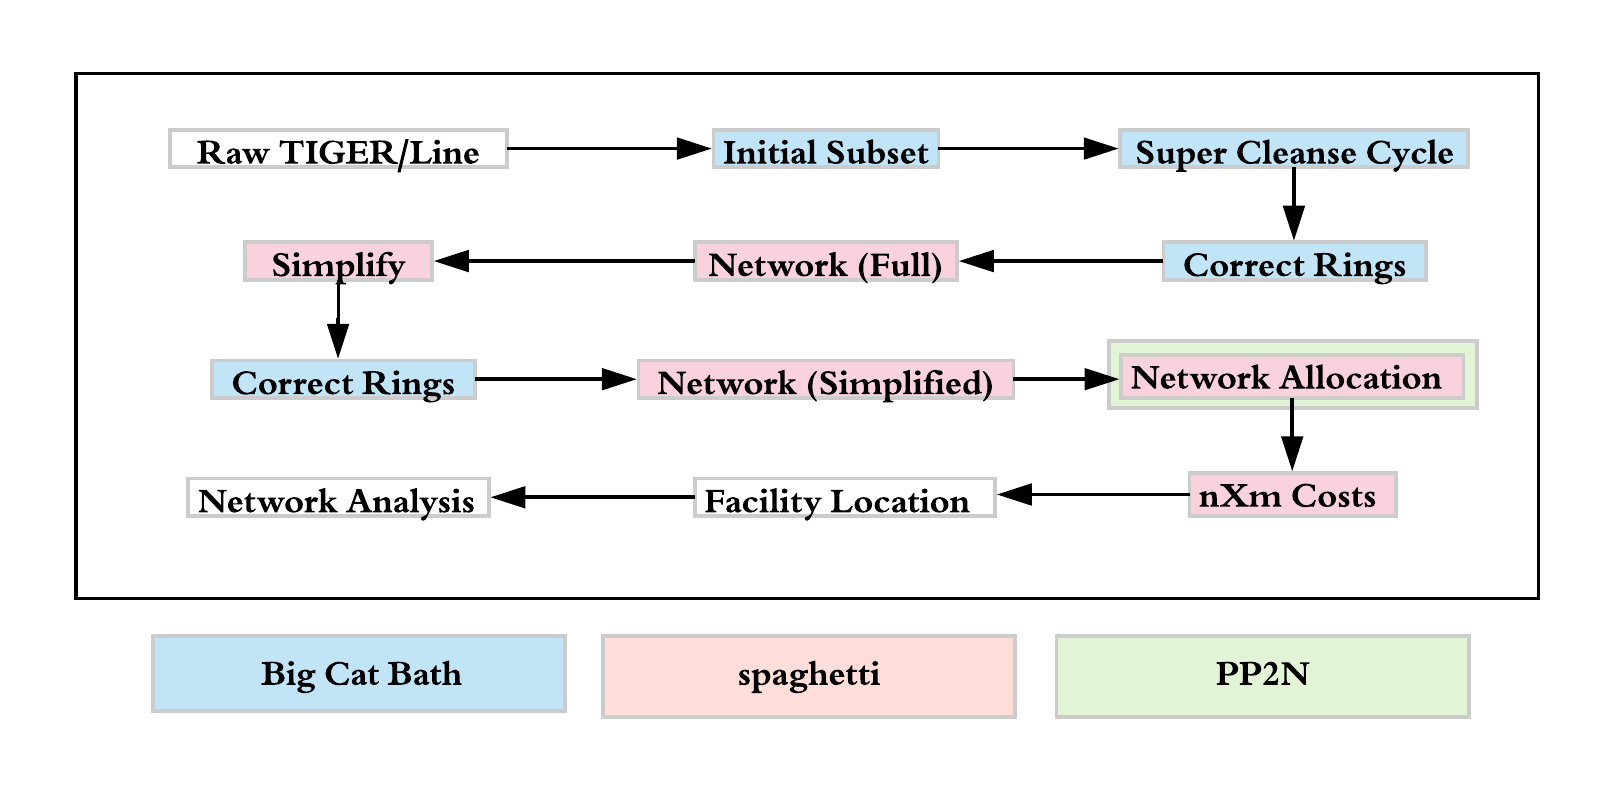

In [2]:
IPd.Image("base_diagram.png")

------------------------------

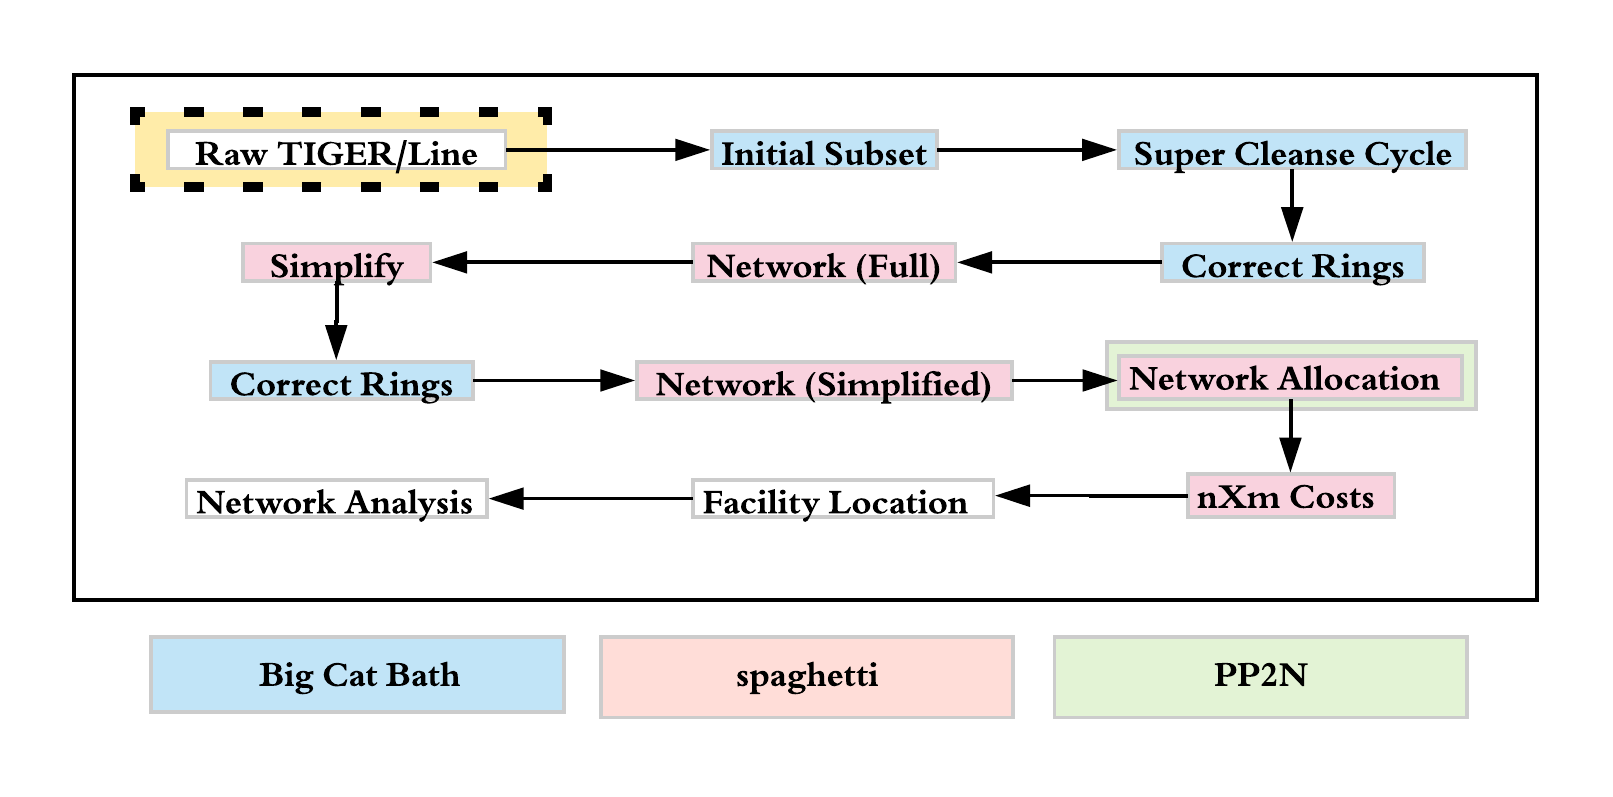

In [3]:
IPd.Image("fig1.png")

# $\text{raw TIGER/Line data}$

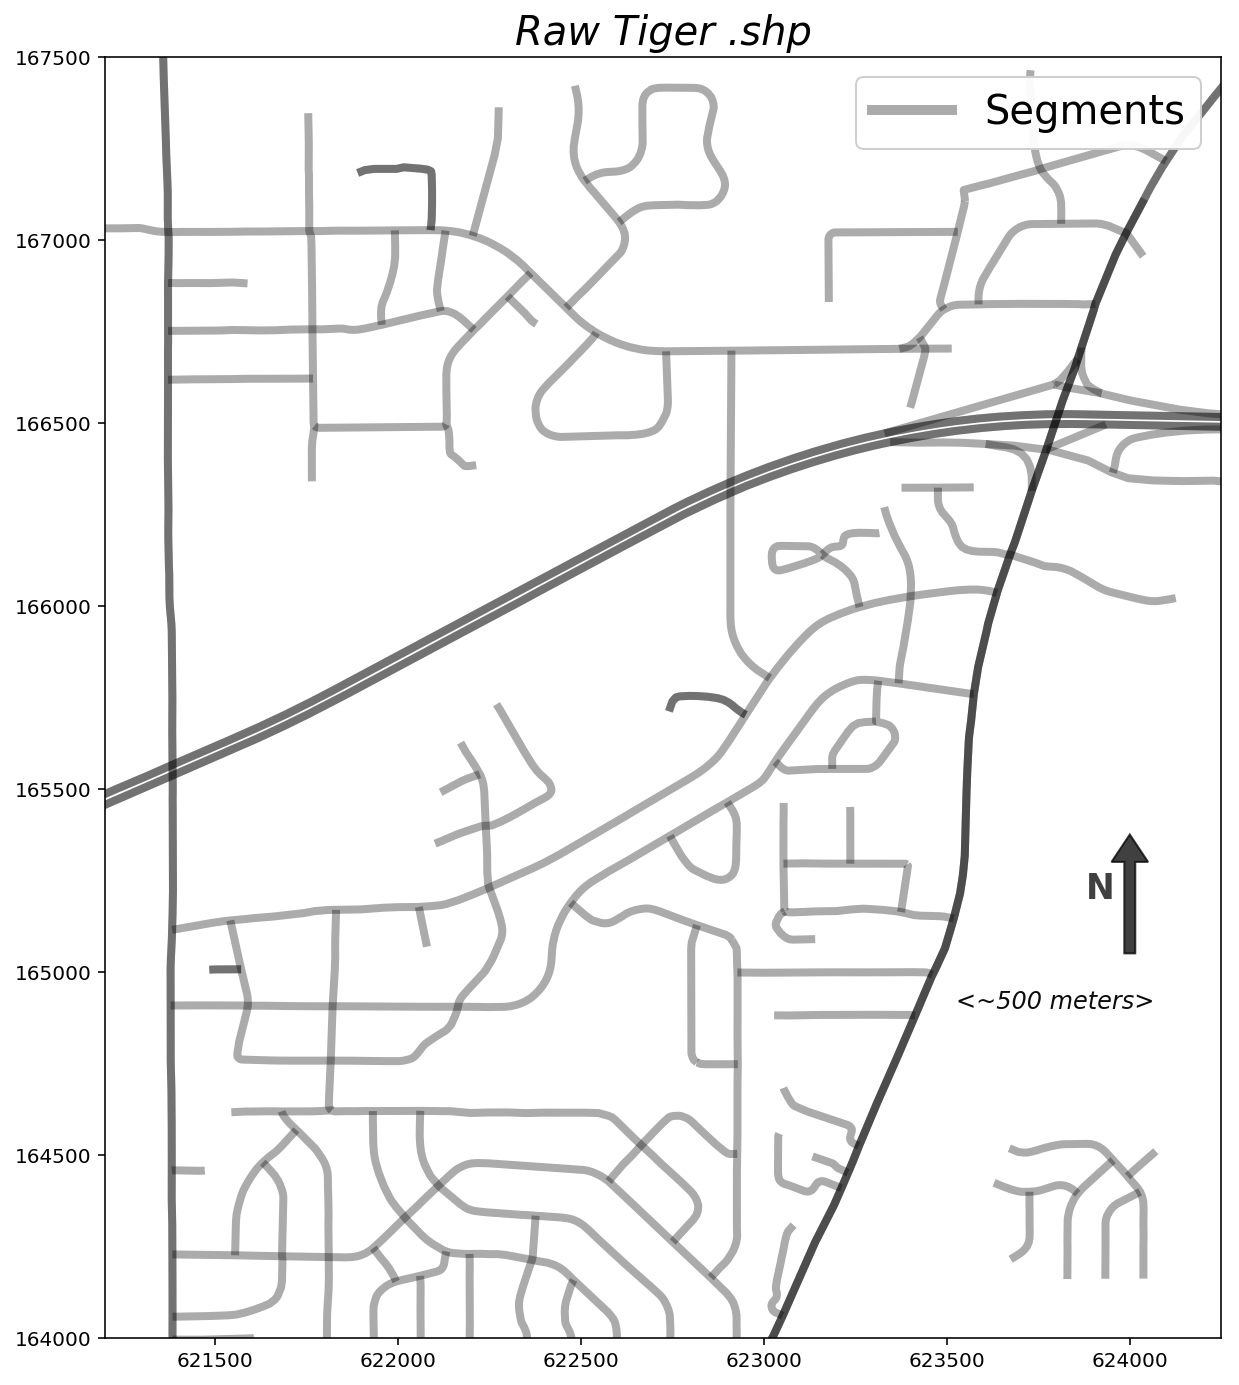

In [4]:
area, dir_type, shp_file1 = "Test_Waverly", "intermediary", "StreetsFull"
inital_segms_df = p.get_plot_shp(area, dir_type, shp_file1)
p.create_plot(area, "single", inital_segms_df, df1_item="Segments",
              title1="Raw Tiger .shp", )

---------------------

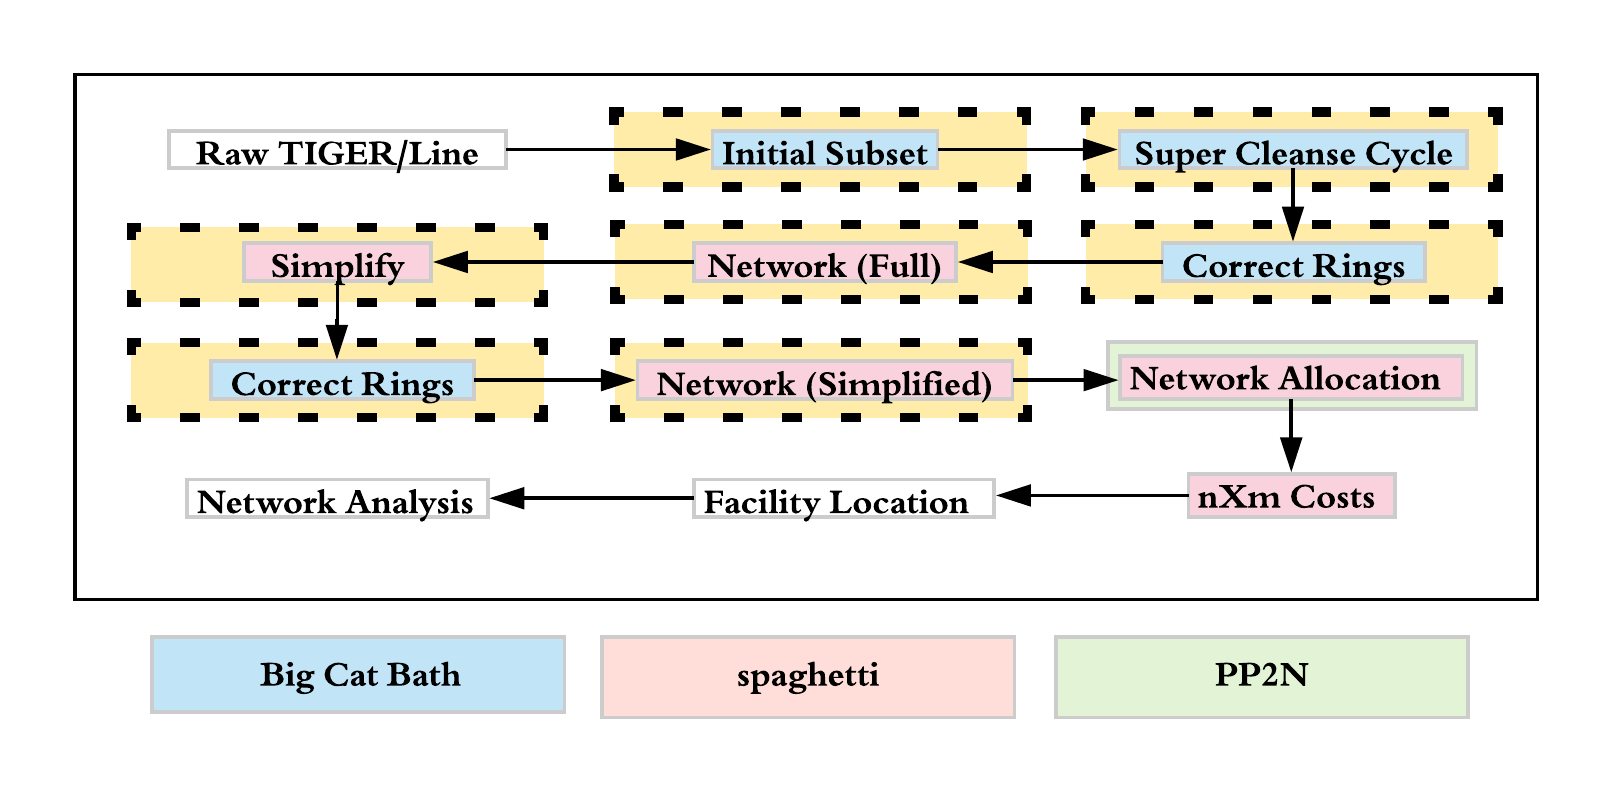

In [5]:
IPd.Image("fig2.png")

# `bigcatbath`

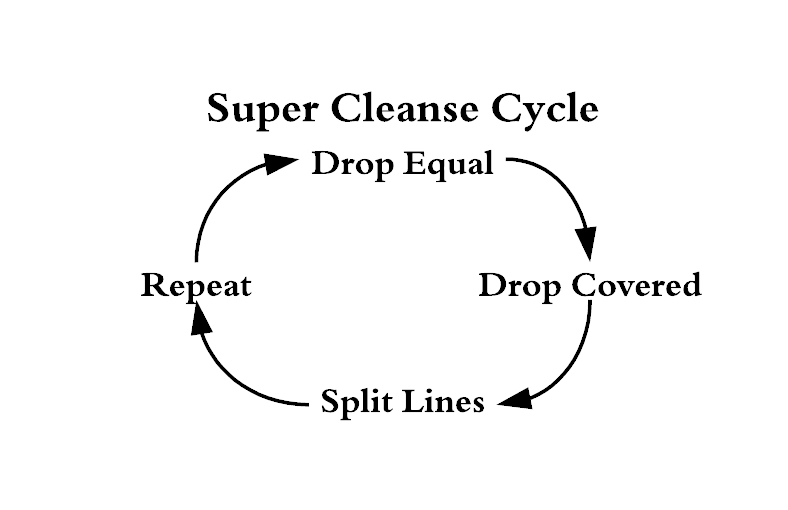

In [6]:
IPd.Image("super_cleanse.png")

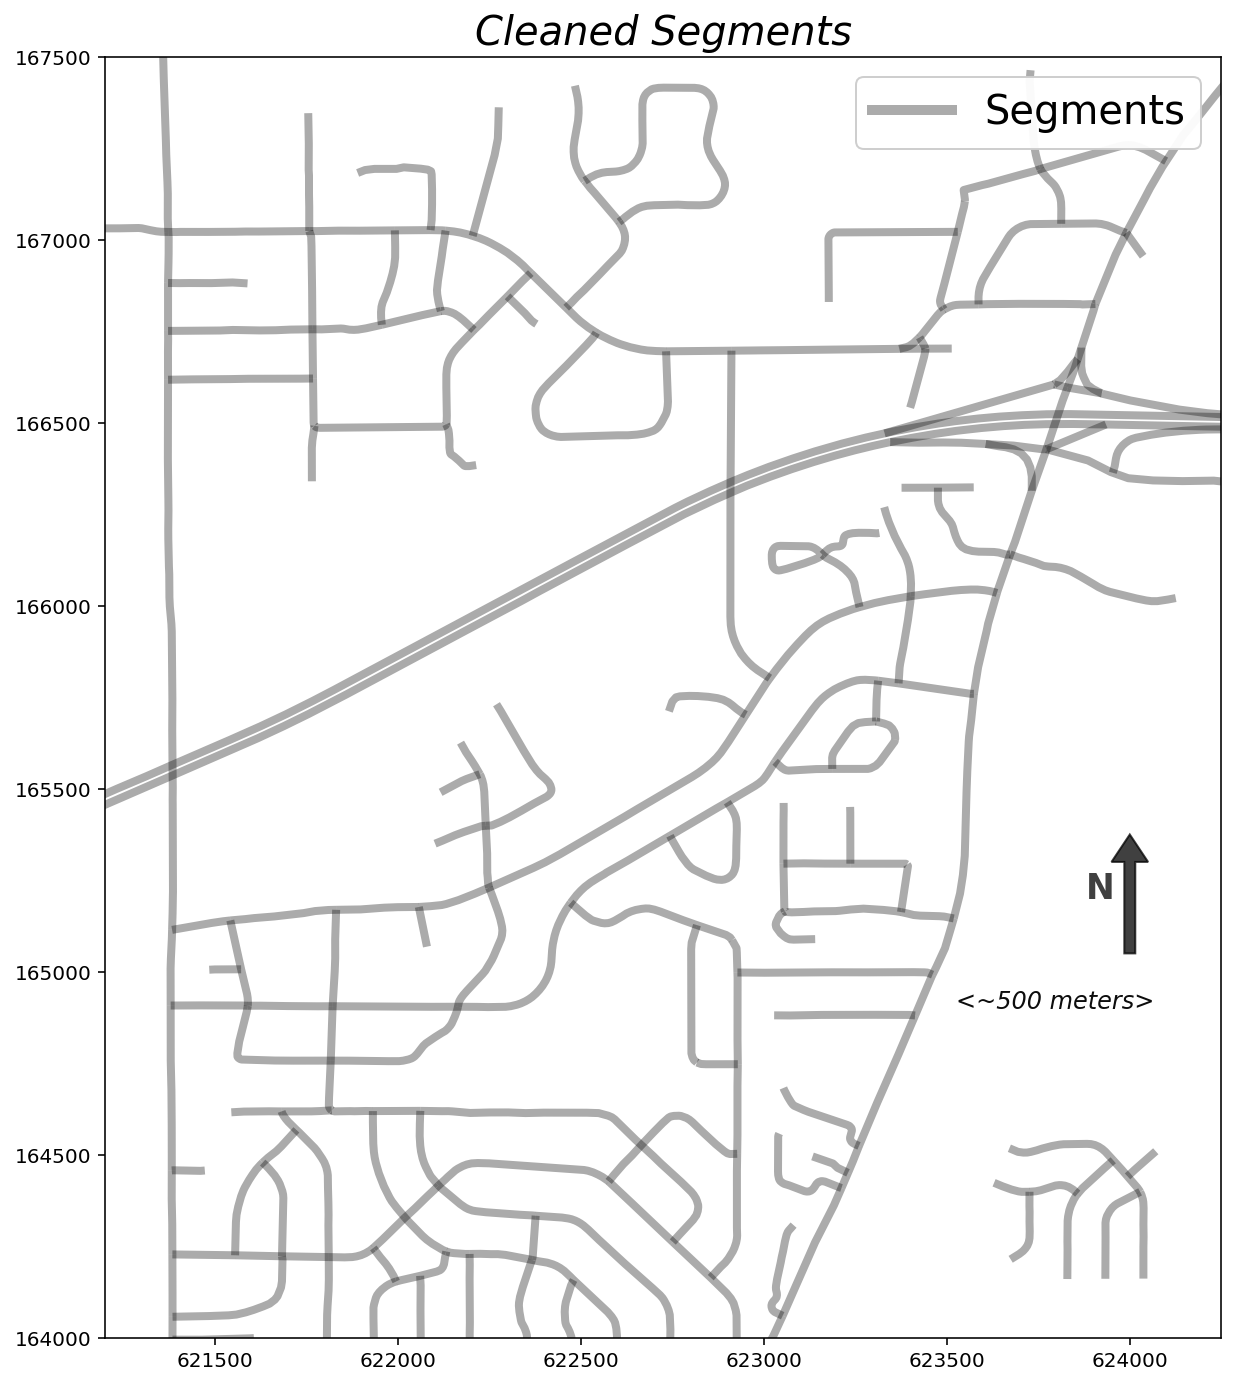

In [7]:
area, dir_type, shp_file2 = "Test_Waverly", "intermediary", "SplitSegms1"
prenet_segms_df = p.get_plot_shp(area, dir_type, shp_file2)
p.create_plot(area, "single", prenet_segms_df, df1_item="Segments",
              title1="Cleaned Segments")

# $\text{raw TIGER/Line data vs.}$ `bigcatbath`

/Users/jgaboardi/anaconda3/envs/py2/lib/python2.7/site-packages/geopandas/plotting.py:385: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


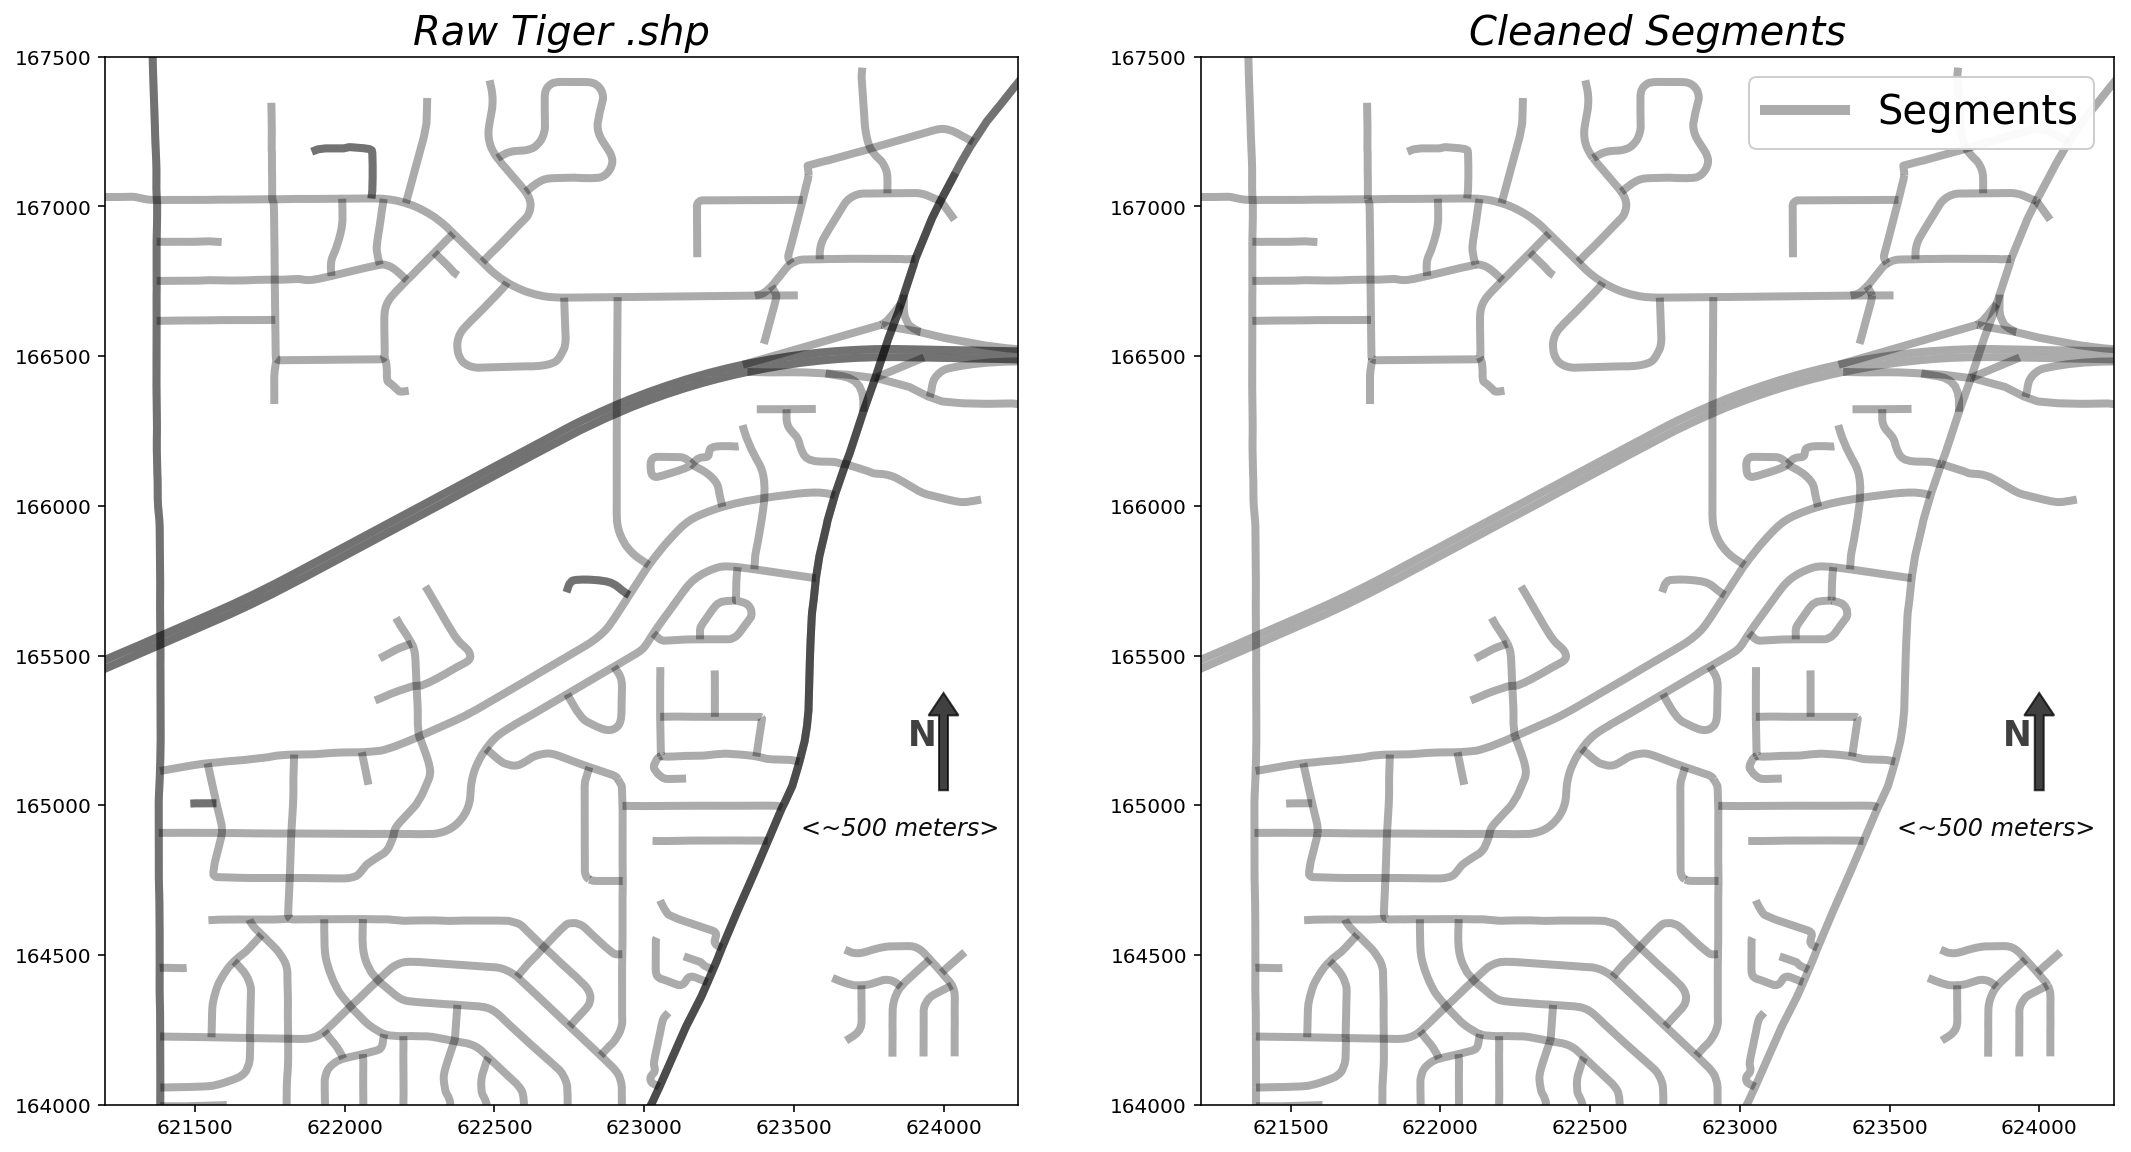

In [8]:
p.create_plot(area, "double", inital_segms_df, df1_item="Segments",
              df2=prenet_segms_df, df2_item="Segments",
              title1="Raw Tiger .shp", title2="Cleaned Segments",
              one_legend_item=True)

-----------------------

# Network Topology

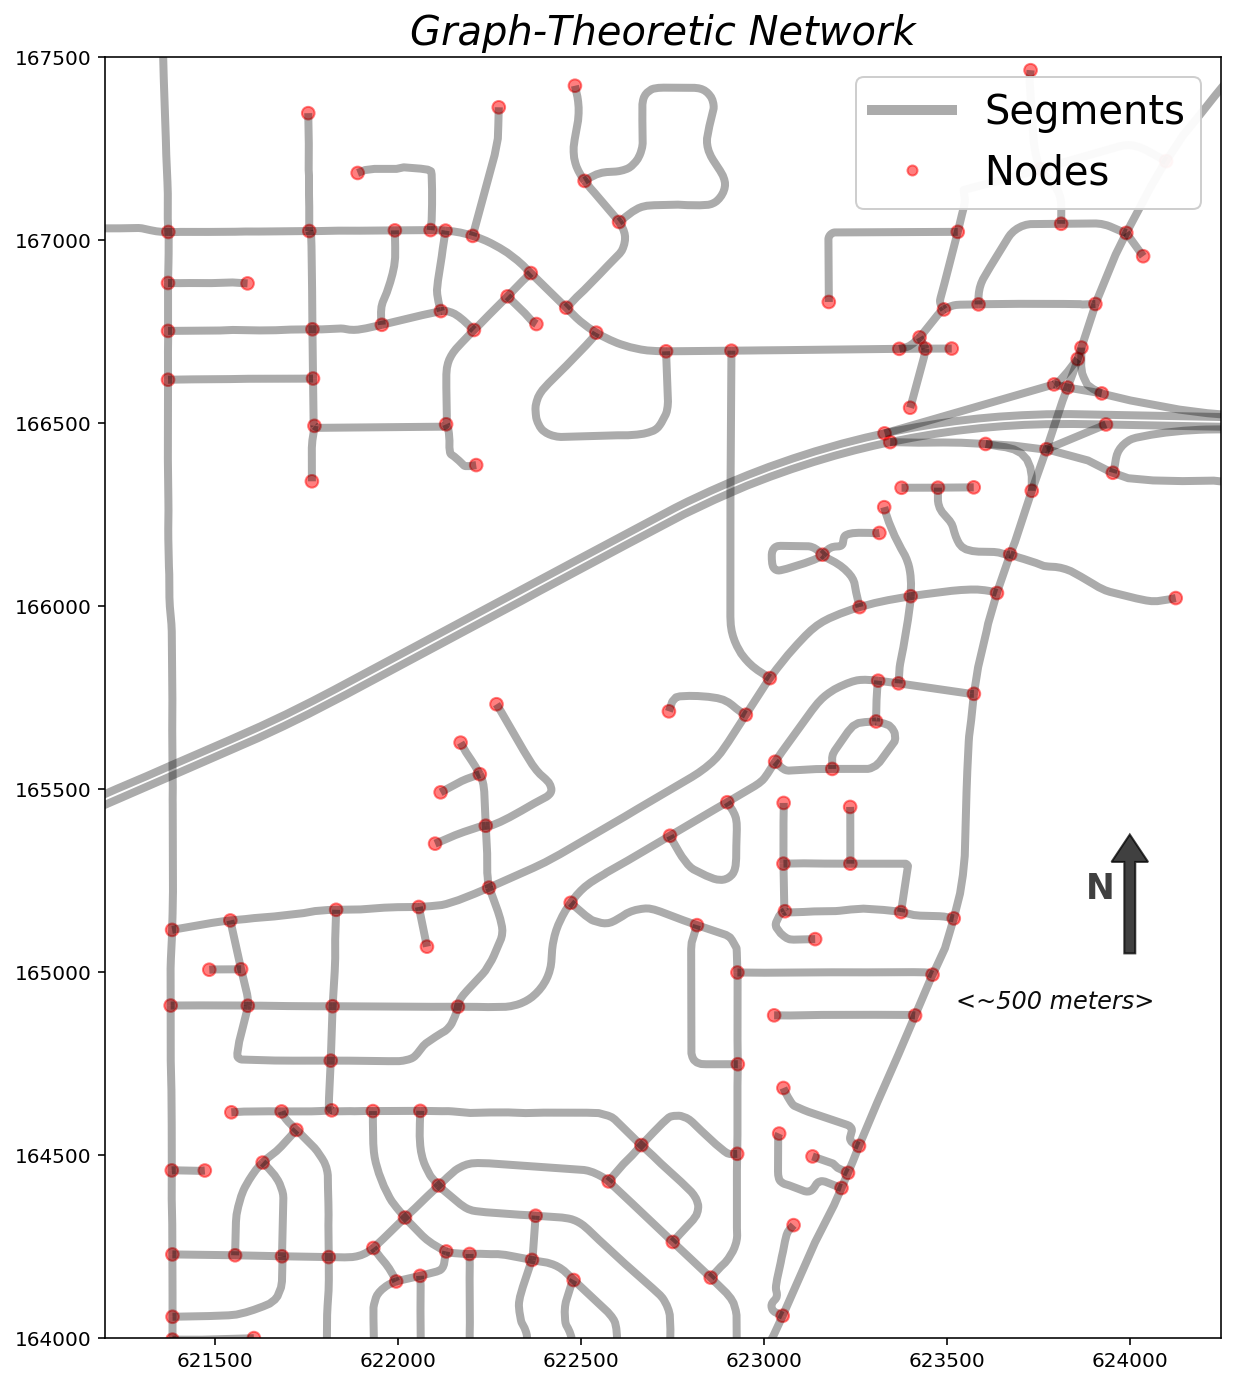

In [9]:
dir_type, shp_file3, shp_file4 = "clean/network_data", "SimplifiedSegms", "SimplifiedNodes"
segmsdf = p.get_plot_shp(area, dir_type, shp_file3)
nodesdf = p.get_plot_shp(area, dir_type, shp_file4)
p.create_plot(area, "single", segmsdf, df2=nodesdf, 
              df1_item="Segments", df2_item="Nodes",
              title1="Graph-Theoretic Network")

# $\text{raw TIGER/Line data vs.}$ `pysal.spaghetti.SpaghettiNetwork`

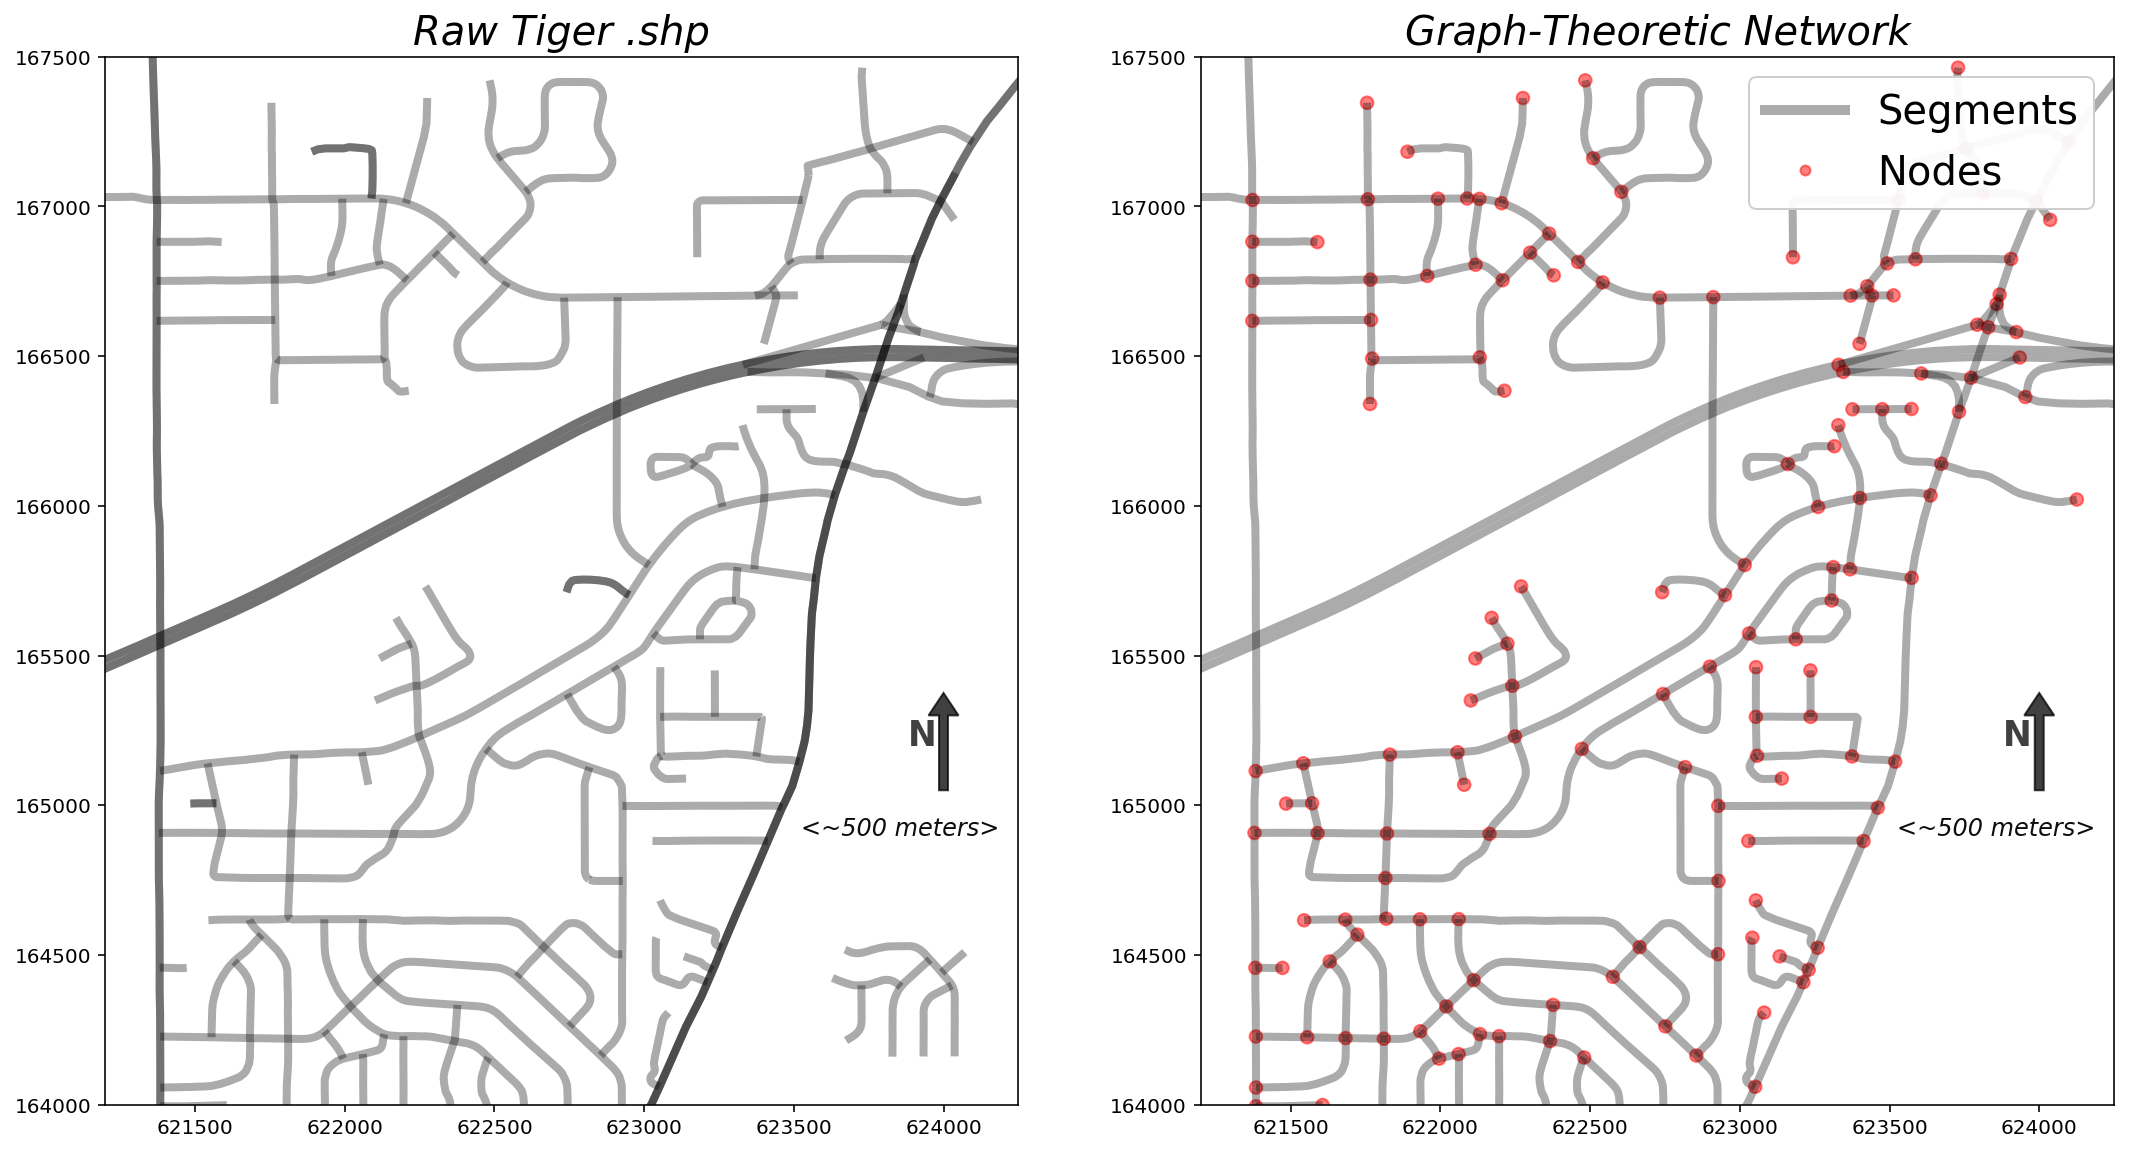

In [10]:
p.create_plot(area, "double", inital_segms_df, df1_item="Segments",
              df2=segmsdf, df2_item="Segments",
              df3=nodesdf, df3_item="Nodes",
              title1="Raw Tiger .shp", title2="Graph-Theoretic Network")

---------------------------------------------

# `pysal.spaghetti.SpaghettiNetwork` object

In [11]:
net_data = "../data/"+area+"/clean/network_data/"
net = spgh.load_pickled_network(net_data)

In [12]:
print dir(net)

['__doc__', '__init__', '__module__', 'actual_object_sizes', 'actual_total_size', 'add_edge', 'add_node', 'adjacency_matrix', 'alpha', 'area', 'beta', 'circuity', 'd_euc', 'd_net', 'diameter', 'entropies_mtfcc', 'entropy_mtfcc', 'eta', 'gamma', 'get_network_stats', 'graphize', 'max_node_degree', 'max_sinuosity', 'mean_node_degree', 'min_node_degree', 'min_sinuosity', 'n2n_costs', 'n2n_euclidean', 'n2n_matrix', 'n2n_matrix_calculation', 'n_edge_conncomp', 'n_node', 'n_segm', 'network_length', 'network_mean_sinuosity', 'network_stats', 'network_std_sinuosity', 'node2coords', 'node2degree', 'node2elem', 'node2geom', 'node2node', 'node2segm', 'node2xyid', 'node_id_name', 'nodes_id_list', 'proj_init', 'radius', 'remove_frames', 'segm2coords', 'segm2elem', 'segm2geom', 'segm2len', 'segm2node', 'segm2segm', 'segm2xyid', 'segm_id_name', 'segms_id_list', 'simplify', 'std_node_degree', 'xyID']



# $ \text{IDs}$

### $ \text{ids for iteration}$

In [13]:
net.nodes_id_list[:3]

[0, 1, 2]

In [14]:
net.segms_id_list[:3]

[0, 1, 2]


### $ \text{ids for non-spatial intersect}$

In [15]:
net.node2xyid[:3]

[[0, ['x623160.308433y166139.674183']],
 [1, ['x622056.937024y165176.928931']],
 [2, ['x622079.141124y165068.444707']]]

In [16]:
net.segm2xyid[4]

[4,
 ['x622973.379534y163908.837794',
  'x623025.986587y164004.950232',
  'x623051.31561y164059.655907',
  'x623051.31561y164059.655907']]


# $ \text{Topoply}$

### $ \text{node2node}$

In [17]:
net.node2node[:3]

[[0, [175, 71]], [1, [2, 170, 103]], [2, [1]]]

### $ \text{node2segm}$

In [18]:
net.node2segm[:3]

[[0, [0, 61, 223]], [1, [1, 189, 190]], [2, [1]]]

### $ \text{segm2segm}$

In [19]:
net.segm2segm[:3]

[[0, [61, 223]], [1, [189, 190]], [2, [3, 165]]]

### $ \text{segm2node}$

In [20]:
net.segm2node[:3]

[[0, [0, 0]], [1, [1, 2]], [2, [3, 4]]]


# $ \text{Rebuild}$  `.shp`  $ \text{through lookups}$ 

### $ \text{node2coords}$

In [21]:
net.node2coords[:3]

[[0, [(623160.308432581, 166139.6741834689)]],
 [1, [(622056.9370244229, 165176.92893093725)]],
 [2, [(622079.1411243104, 165068.44470656238)]]]

### $ \text{node2geom}$

In [22]:
net.node2geom[:3]

[[0, <shapely.geometry.point.Point at 0x12701c910>],
 [1, <shapely.geometry.point.Point at 0x12701c750>],
 [2, <shapely.geometry.point.Point at 0x12701c310>]]

### $ \text{segm2coords}$

In [23]:
net.segm2coords[4]

[4,
 [(622973.3795343956, 163908.83779372086),
  (623025.986587122, 164004.95023215417),
  (623051.3156096754, 164059.65590696214),
  (623051.3156096754, 164059.65590696214)]]

### $ \text{segm2geom}$

In [24]:
net.segm2geom[4]

[4, <shapely.geometry.linestring.LineString at 0x127b88d50>]

# $ \text{Descriptive Network Statistics}$

In [25]:
net.network_stats

,Measure,Value
Type,,
Node,n Nodes,176
Node,Min Node Degree,1
Node,Max Node Degree,5
Node,Mean Node Degree,2.625
Node,StD Node Degree,1.0177
,,
Segment,n Segments,231
Segment,Length,174660
Segment,Radius,"(19, 20) - 32.8005014276"


--------------------

# $ \text{All-to-All network nodes costs}$

In [26]:
net.n2n_matrix[:4,:4]

array([[    0.        ,  1688.28261496,  1799.01584841,  6486.03152261],
       [ 1688.28261496,     0.        ,   110.73323345,  5093.76854642],
       [ 1799.01584841,   110.73323345,     0.        ,  5204.50177987],
       [ 6486.03152261,  5093.76854642,  5204.50177987,     0.        ]])

-----------------------------------

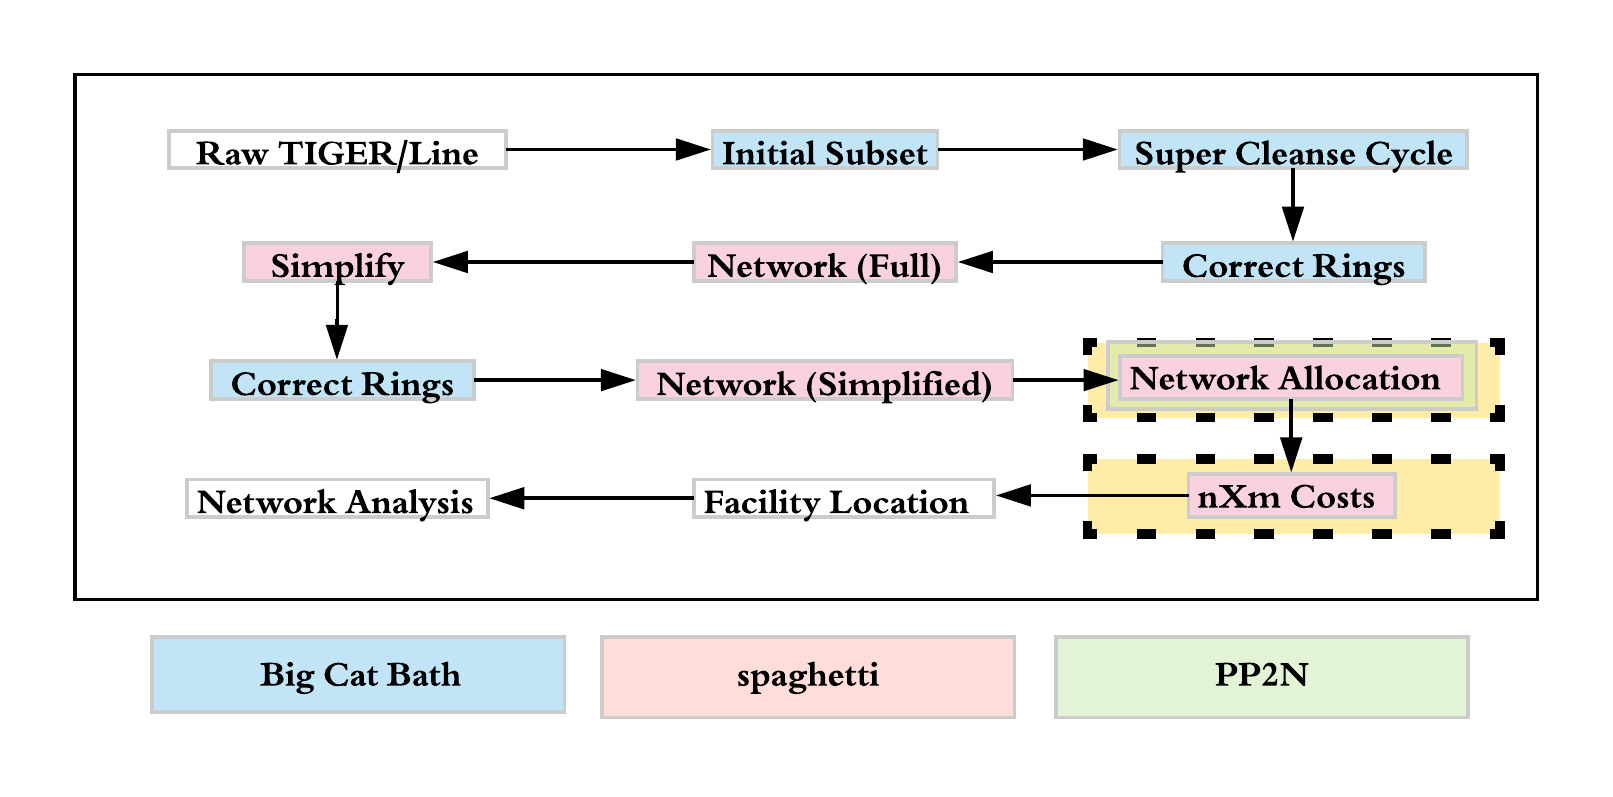

In [27]:
IPd.Image("fig3.png")

# $ \text{Snapping observations to the network}$

### $ \text{Snapping to network nodes}$

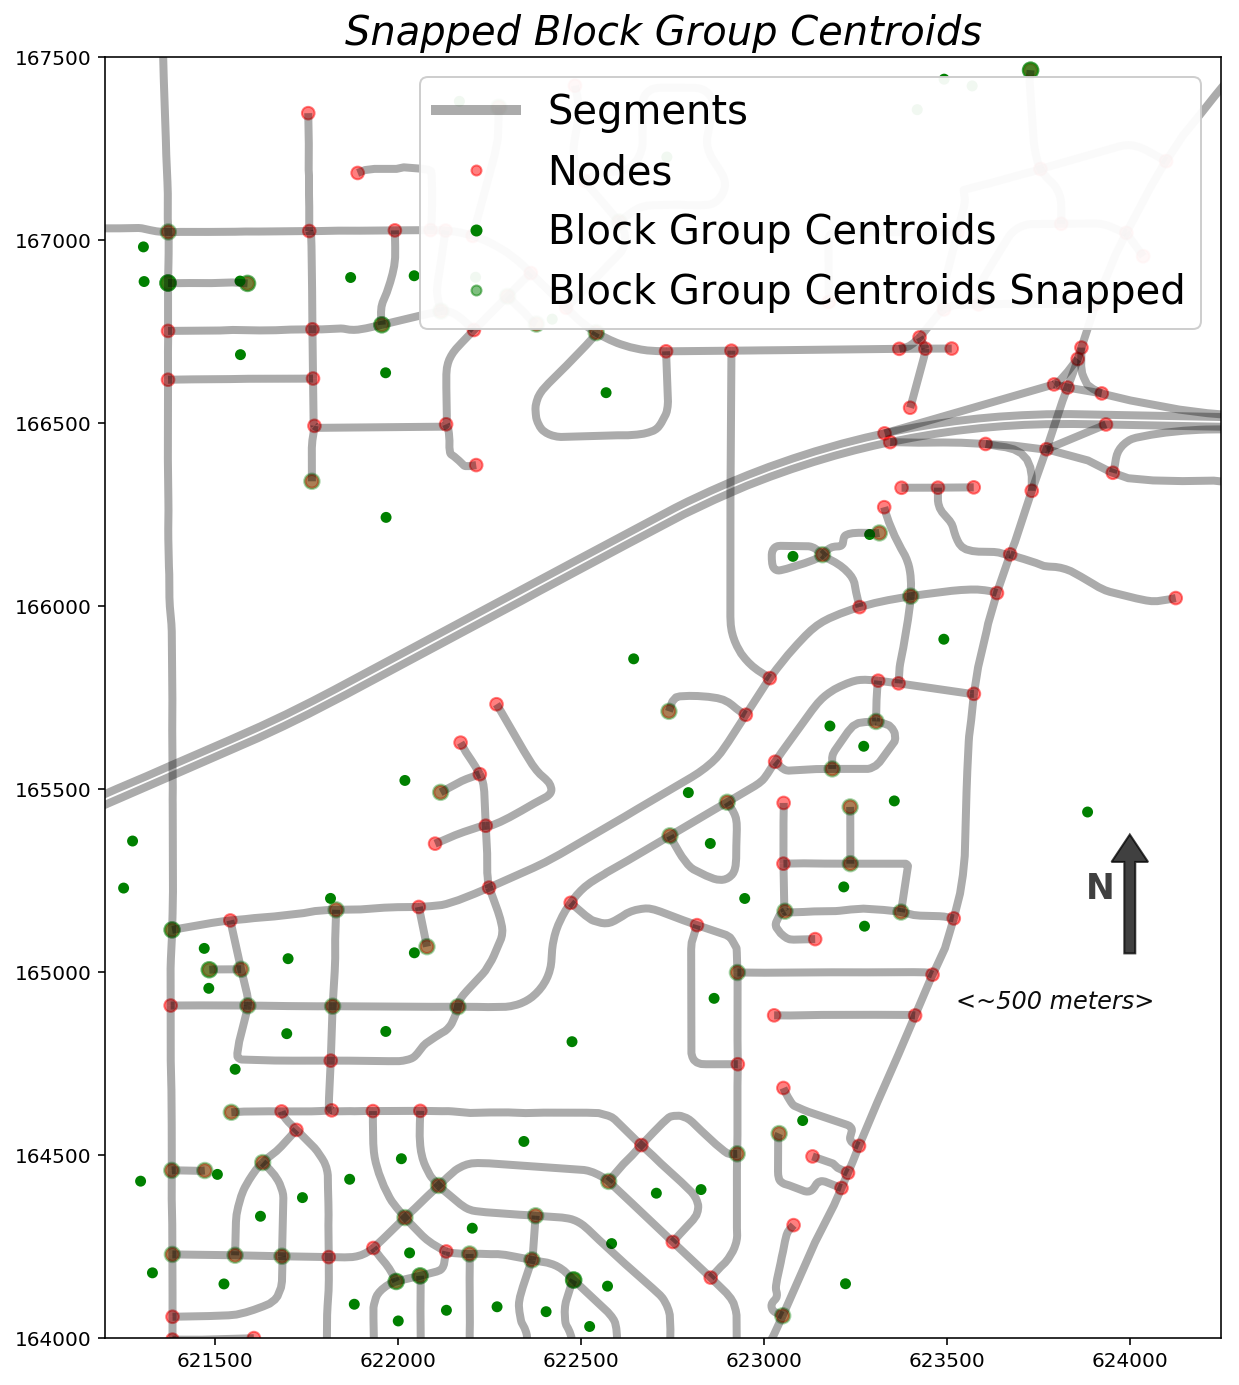

In [28]:
dir_type = "clean/census_data"
shp_file5 = "CensusBlocksPopulatedCentroids"
shp_file6 = "Snapped_to_nodes_CensusBlocksPopulatedCentroids"
blockcent_df = p.get_plot_shp(area, dir_type, shp_file5)
snap_node_blockcent_df = p.get_plot_shp(area, dir_type, shp_file6)
p.create_plot(area, "single", segmsdf, df2=nodesdf,
              df3=blockcent_df, df4=snap_node_blockcent_df,
              df1_item="Segments", df2_item="Nodes",
              df3_item="Block Group Centroids",
              df4_item="Block Group Centroids Snapped",
              title1="Snapped Block Group Centroids")

### $ \text{Snapping to network segments}$

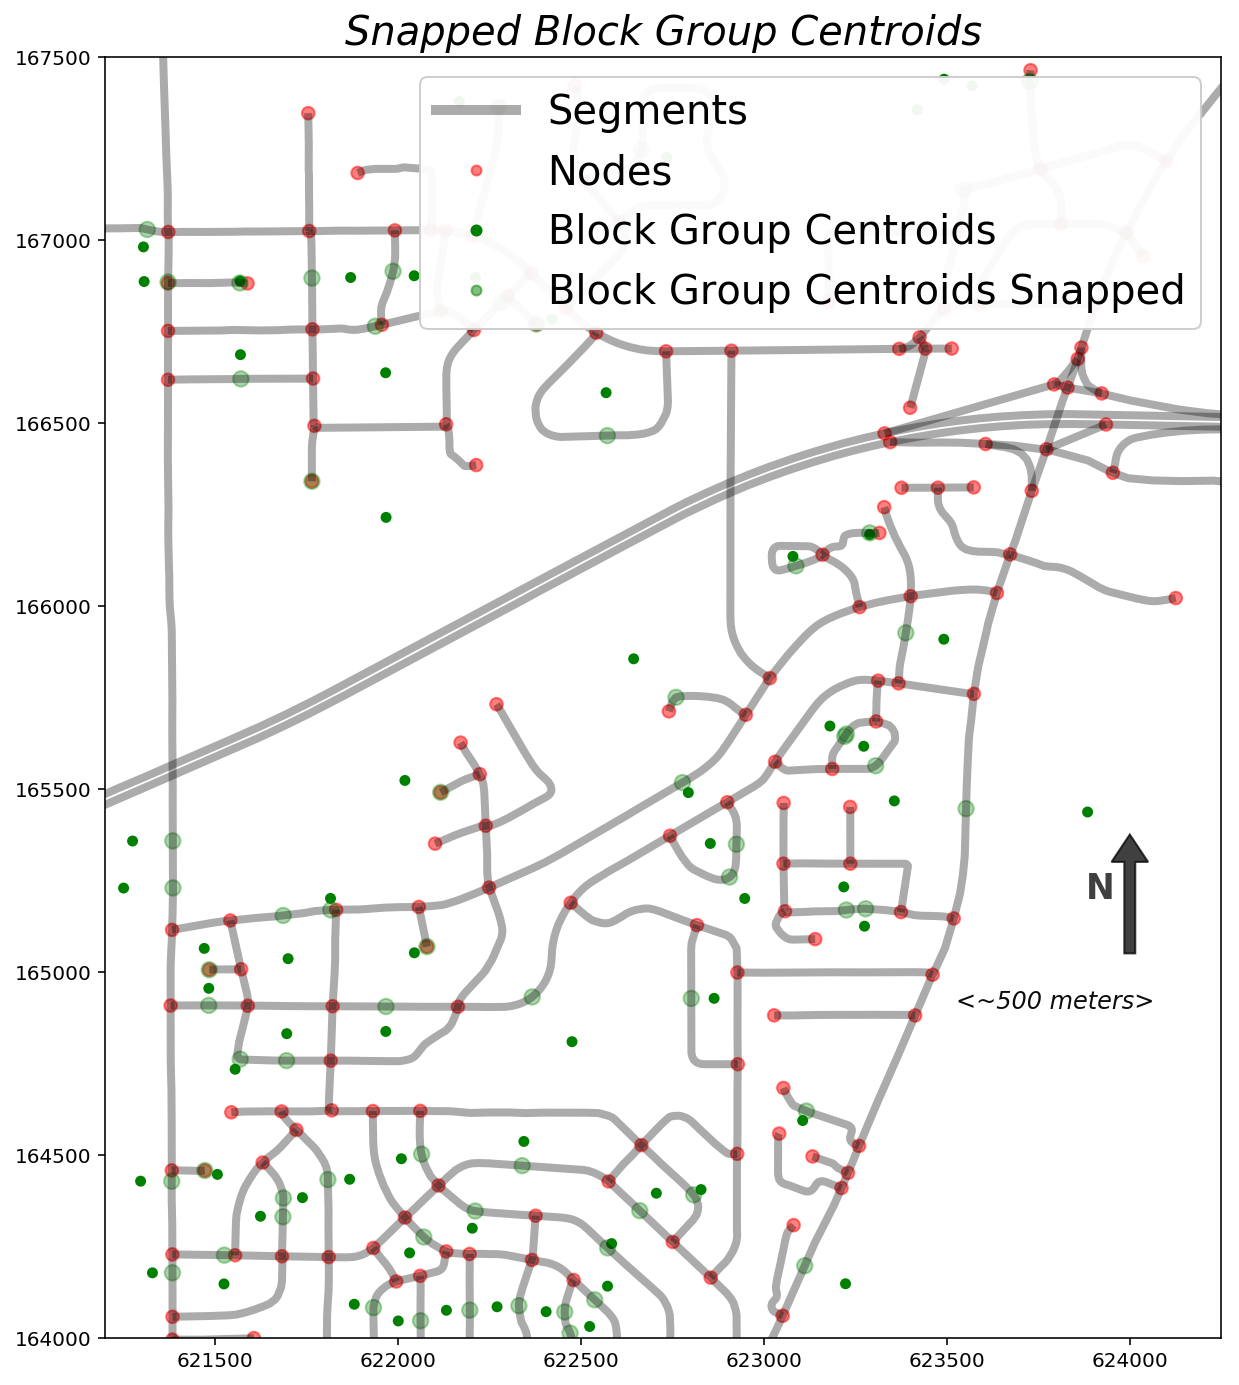

In [29]:
shp_file7 = "Snapped_to_segments_CensusBlocksPopulatedCentroids"
snap_segm_blockcent_df = p.get_plot_shp(area, dir_type, shp_file7)
p.create_plot(area, "single", segmsdf, df2=nodesdf,
              df3=blockcent_df, df4=snap_segm_blockcent_df,
              df1_item="Segments", df2_item="Nodes",
              df3_item="Block Group Centroids",
              df4_item="Block Group Centroids Snapped",
              title1="Snapped Block Group Centroids")

--------------------

# $ \text{Observations to observations costs}$

### $ \text{Snapped to network nodes costs}$

In [30]:
cost_data = "../data/"+area+"/clean/cost_matrices/"
file_name = "PopulatedBlockCentroids_x_PopulatedBlockCentroids_snapped_to_nodes_DataFrame"
obs_snap_node = pd.read_csv(cost_data+file_name+".csv", index_col=0)
obs_snap_node.iloc[:5,:5]

,120730008003028,120730016012013,120730007002047,120730008003012,120730017001016
120730008003028,0.000000,3032.385658,1344.676839,567.997762,4660.192822
120730016012013,3032.385658,0.000000,3700.360255,2923.681178,1776.181552
120730007002047,1344.676839,3700.360255,0.000000,1235.972359,5328.167419
120730008003012,567.997762,2923.681178,1235.972359,0.000000,4551.488342
120730017001016,4660.192822,1776.181552,5328.167419,4551.488342,0.000000


### $ \text{Snapped to network segments costs}$

In [31]:
file_name = "PopulatedBlockCentroids_x_PopulatedBlockCentroids_snapped_to_segments_DataFrame"
obs_snap_segm = pd.read_csv(cost_data+file_name+".csv", index_col=0)
obs_snap_segm.iloc[:5,:5]

,120730008003028,120730016012013,120730007002047,120730008003012,120730017001016
120730008003028,0.000000,4810.835654,1474.640744,328.803871,5271.861675
120730016012013,4810.835654,0.000000,3560.604454,4574.435449,1696.079228
120730007002047,1474.640744,3560.604454,0.000000,1281.074912,5217.434186
120730008003012,328.803871,4574.435449,1281.074912,0.000000,5035.461470
120730017001016,5271.861675,1696.079228,5217.434186,5035.461470,0.000000


------------------------

# $ \text{Population Polygons to Networks}$

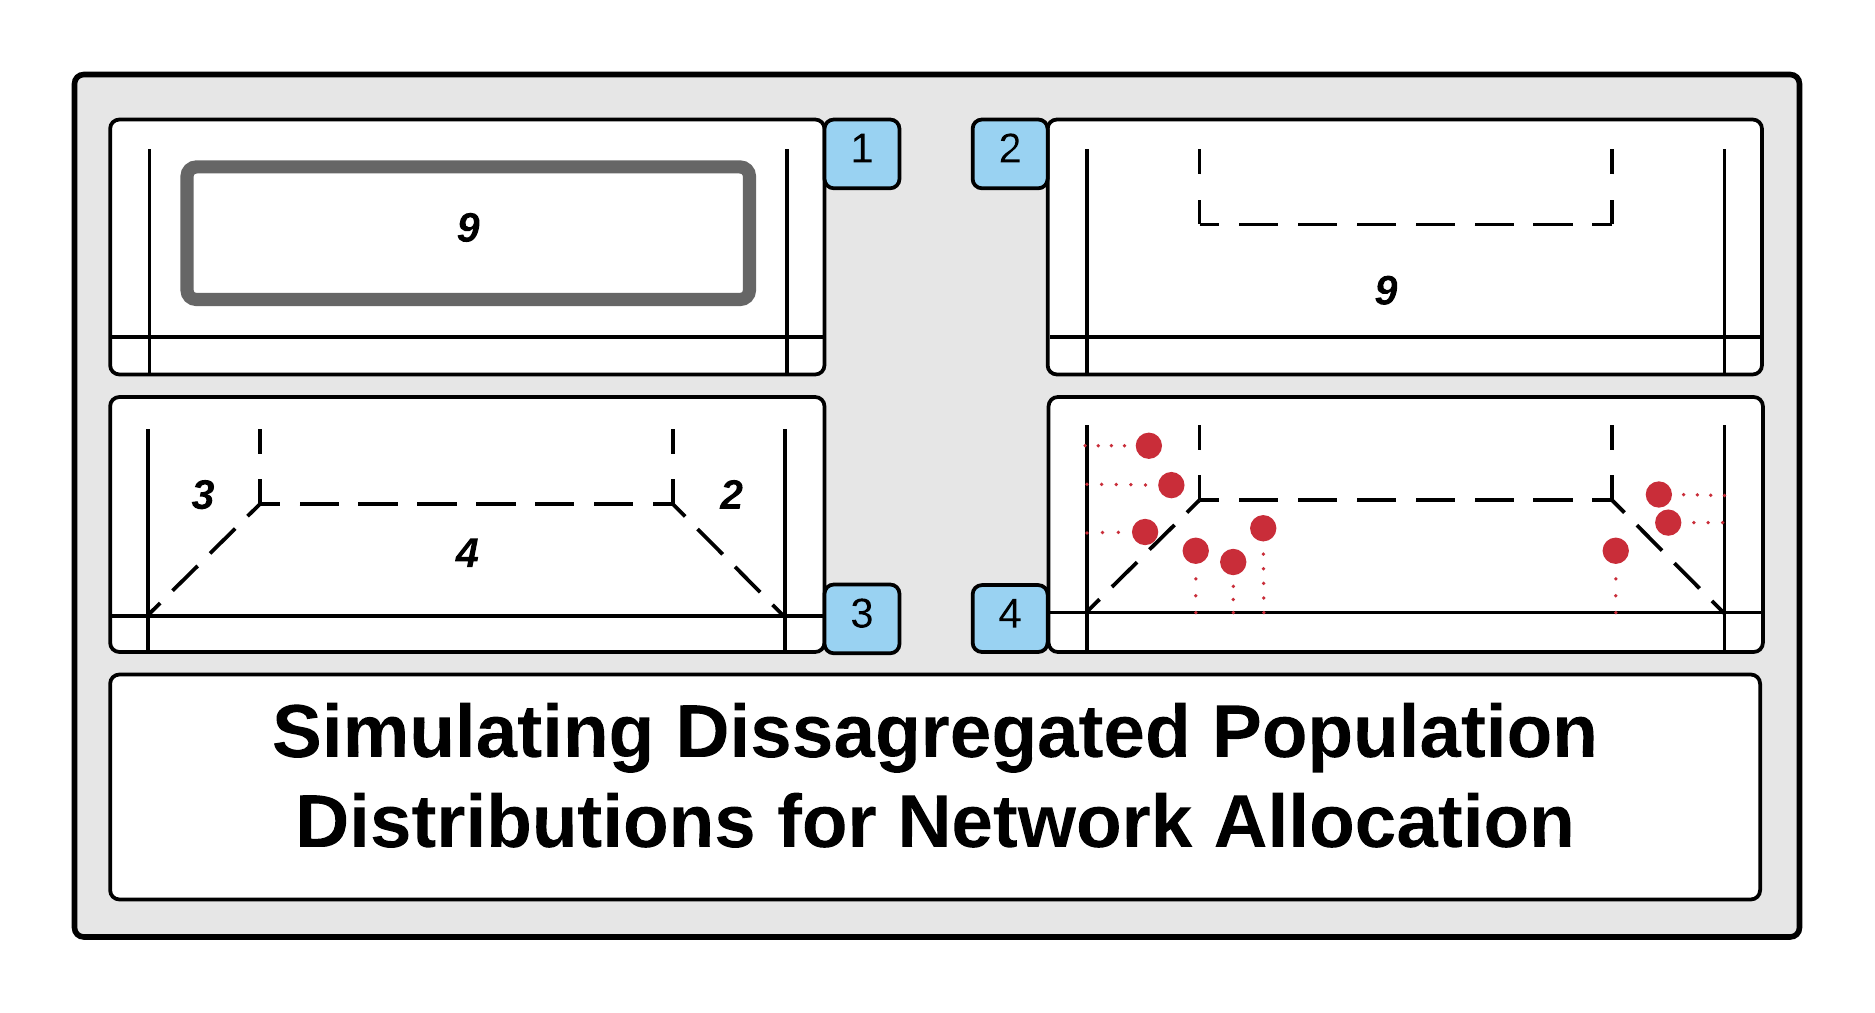

In [32]:
IPd.Image("pp2n.png")

## $ \Rightarrow \text{Based on populated census blocks}$
## $ \Rightarrow \text{Each segment associated with a polygon on either side}$
## $ \Rightarrow \text{Each polygon receives population value based on:}$ 
## $  \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \text{proportional area of pp2n polygon vs. total area of}$
## $  \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \text{pp2n polygons associated with original census geography}$
## $ \Rightarrow \text{Larger census geographies are built up from blocks}$

# $ \text{Example on synthetic grid}$

### $ \text{Set synthetic grid args}$

In [33]:
fill_cols = {"MTFCC":"S1400","MTFCCRank":2,"RTTYP":"none"}
grid_args = {"hl":2,"vl":1,"hb":2,"vb":1,"withbox":False,
             "fill_cols":fill_cols, "densify":False, "density":"vdense",
             "drop_links":False, "len_col":"LenMeters",
             "geo_col":"geometry", "seed":1982}

### $ \text{Generate synthetic grid}$

In [34]:
spghGrid = spgh.SpaghettiNetwork(grid_args=grid_args, segm_id_name="SegID",
                                 node_id_name="NodeID", proj_init=2779,
                                 largest_component=True, from_scratch=True,
                                 progress=False, record_geometry=True,
                                 geo_col="geometry", len_col="LenMeters")

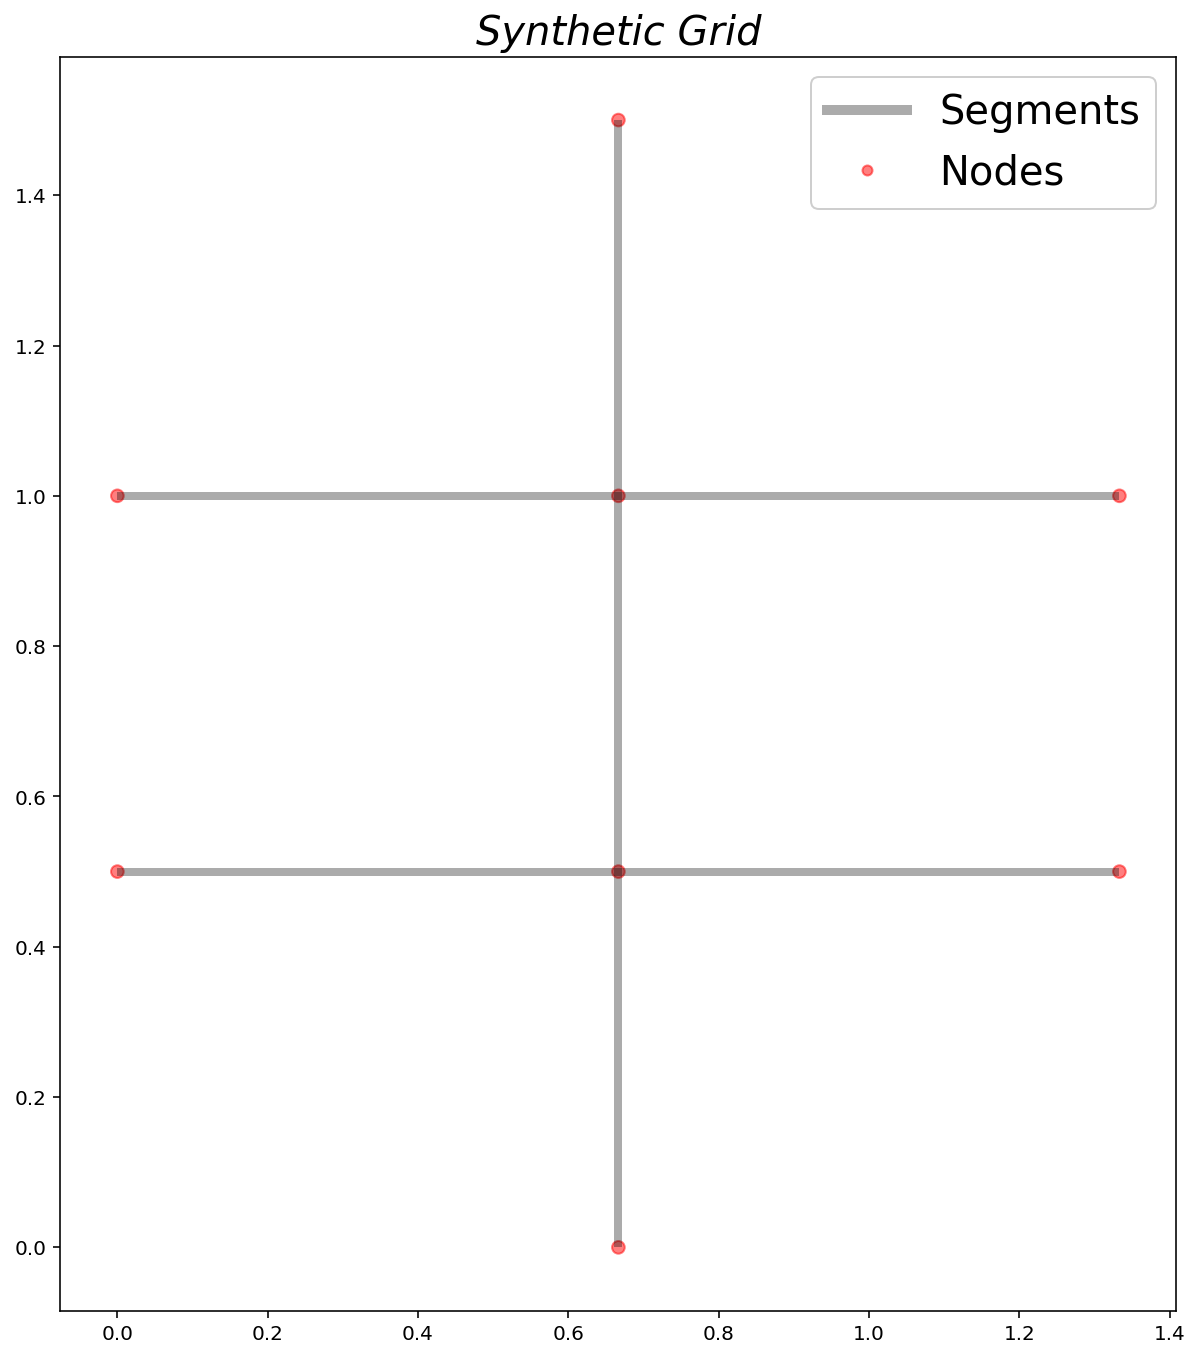

In [35]:
area = "Grid"
p.create_plot(area, "single", spghGrid.s_data, df2=spghGrid.n_data,
              df1_item="Segments", df2_item="Nodes",
              title1="Synthetic Grid")

# $ \text{Generate PP2N from synthetic grid}$

In [36]:
pp2n = spgh.pp2n(spghGrid.s_data, geo_col="geometry",
                 offset_back=.2, offset_front=0.025, offset_in=-0.025)

/Users/jgaboardi/anaconda3/envs/py2/lib/python2.7/site-packages/matplotlib/patches.py:121: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


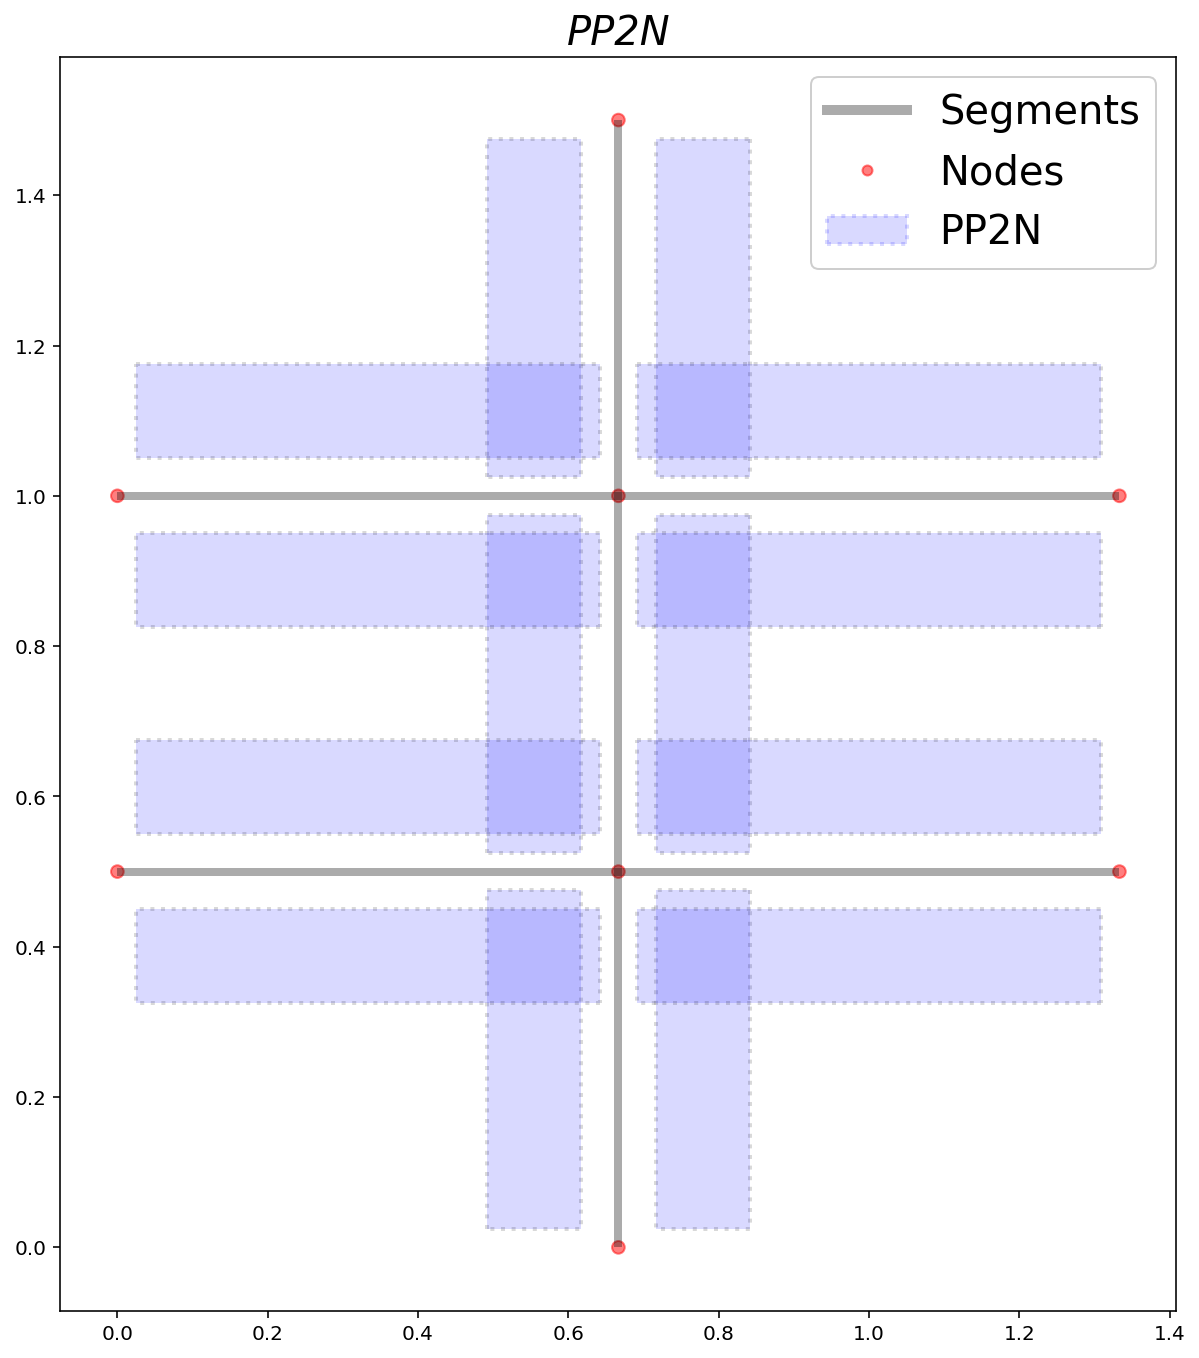

In [37]:
area = "Grid"
p.create_plot(area, "single", spghGrid.s_data, df2=spghGrid.n_data, df5=pp2n,
              df1_item="Segments", df2_item="Nodes", df5_item="PP2N",
              title1="PP2N")

----------------------------

# $ \text{What's next?}$

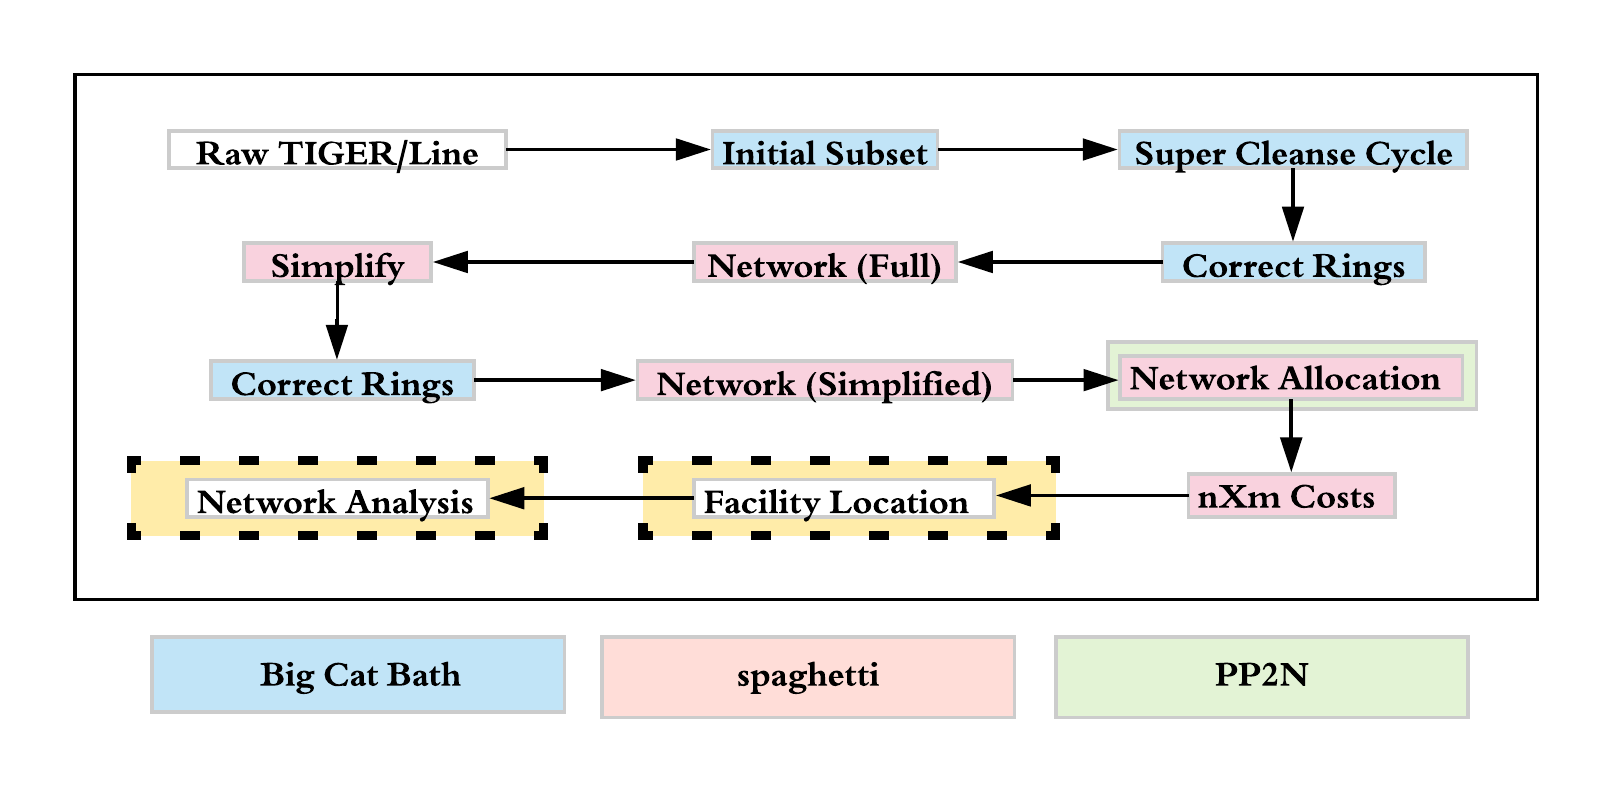

In [38]:
IPd.Image("fig4.png")

------------------

# $ \text{Facility Location}$
## $ \longrightarrow  \text{Fire stations to population}$

### $ \Rightarrow p \text{-median problem}$

### $ \Rightarrow p \text{-center problem}$
### $ \Rightarrow \text{set covering location problem}$
### $ \Rightarrow \text{maximum covering location problem}$

----------------------

# $ \text{Network Analysis}$
## $ \longrightarrow  \text{Population to population}$

### $ \Rightarrow \text{Network Nearest Neighbor}$
### $ \Rightarrow \text{Network } K \text{ Function}$

## $ \longrightarrow  \text{Population to residential incident calls}$
### $ \Rightarrow \text{Cross Network Nearest Neighbor}$
### $ \Rightarrow \text{Cross Network } K \text{ Function}$

---------------------------

# $ \text{Following analysis on publicly available census data}$

## $ \Rightarrow \text{Benchmarking solution quality based on actual household-level data}$

## $ \Rightarrow \text{Highly restricted census microdata}$

## $ \Rightarrow \text{Project approved by the US Census Bureau}$

----------------------------

# $ \text{System Specs}$

In [39]:
utils.print_specs()



*******************************************************************
	python			2.7.13
	platform		Darwin-17.5.0-x86_64-i386-64bit
	cenpy			0.8.8.0dev
	geopandas		0.3.0
	pandas			0.20.3
	pysal			1.14.0
	shapely			1.6.2.post1
*******************************************************************




--------------------

# $ \text{email } \Longrightarrow \text{ jgaboardi@fsu.edu} $

# $ \text{GitHub } \Longrightarrow \text{https://github.com/jGaboardi/} $

# $ \text{GitHub } \Longrightarrow \text{https://github.com/pysal/} $

-------------------------